## Descripció

Aprèn a realitzar test d'hipòtesis amb Python.

## Nivell 1

**- Exercici 1:**
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

Prenem la base de dades d'atletes de les olímpiades :
https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

Abstrat: basic bio data on athletes and medal results from Athens 1896 to Rio 2016

I n'agafem les dades dels practicants d'atletisme només:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
athletes_df=pd.read_csv('athlete_events.csv')
athletes_df.drop(athletes_df[athletes_df['Sport']!='Athletics'].index,inplace=True)
del athletes_df['Sport']
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics Women's 100 metres,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics Women's 4 x 100 metres Relay,NaN
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics Men's Shot Put,NaN
94,31,Evald rma (rman-),M,24.0,174.0,70.0,Estonia,EST,1936 Summer,1936,Summer,Berlin,Athletics Men's Pole Vault,NaN
95,32,Olav Augunson Aarnes,M,23.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Athletics Men's High Jump,NaN


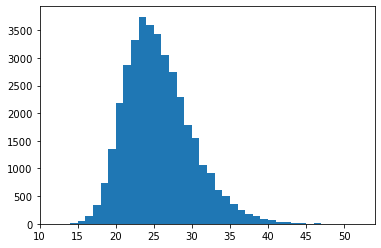

In [3]:
plt.hist(athletes_df['Age'], bins=40)
plt.show()

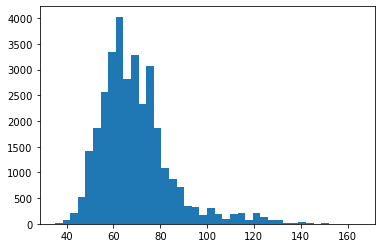

In [4]:
plt.hist(athletes_df['Weight'], bins=40)
plt.show()

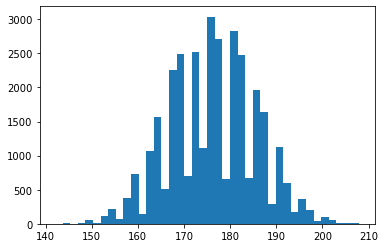

In [5]:
plt.hist(athletes_df['Height'], bins=40)
plt.show()

In [6]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38624 entries, 26 to 271103
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      38624 non-null  int64  
 1   Name    38624 non-null  object 
 2   Sex     38624 non-null  object 
 3   Age     37507 non-null  float64
 4   Height  32907 non-null  float64
 5   Weight  32601 non-null  float64
 6   Team    38624 non-null  object 
 7   NOC     38624 non-null  object 
 8   Games   38624 non-null  object 
 9   Year    38624 non-null  int64  
 10  Season  38624 non-null  object 
 11  City    38624 non-null  object 
 12  Event   38624 non-null  object 
 13  Medal   3969 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 4.4+ MB


Falten moltes dades d'edat, pes i alçada. Les substituim pel promig del grup distingint entre home i dona:

In [7]:
par_to_fil=['Age',  'Height' , 'Weight'] 
athletes_df_modif=athletes_df.copy()
for s in ['M','F']:
        for p in par_to_fil:
            mean=athletes_df_modif[athletes_df_modif['Sex']==s][p].mean()
            athletes_df_modif.loc[(athletes_df_modif[p].isnull())&(athletes_df_modif['Sex']==s),p]=float(mean)        

In [8]:
athletes_df_modif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38624 entries, 26 to 271103
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      38624 non-null  int64  
 1   Name    38624 non-null  object 
 2   Sex     38624 non-null  object 
 3   Age     38624 non-null  float64
 4   Height  38624 non-null  float64
 5   Weight  38624 non-null  float64
 6   Team    38624 non-null  object 
 7   NOC     38624 non-null  object 
 8   Games   38624 non-null  object 
 9   Year    38624 non-null  int64  
 10  Season  38624 non-null  object 
 11  City    38624 non-null  object 
 12  Event   38624 non-null  object 
 13  Medal   3969 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 4.4+ MB


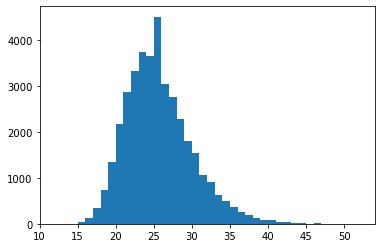

In [9]:
plt.hist(athletes_df_modif['Age'], bins=40)
plt.show()

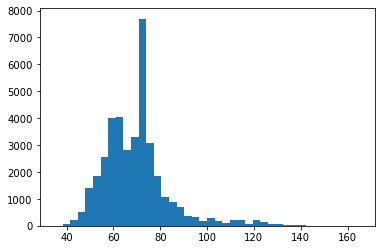

In [10]:
plt.hist(athletes_df_modif['Weight'], bins=40)
plt.show()

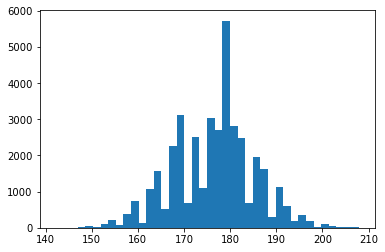

In [11]:
plt.hist(athletes_df_modif['Height'], bins=40)
plt.show()

Si les comparem amb les dades anteriors al fer aquesta modificació donem massa preminència al promig. De tal manera que treballaré amb les dades reals sense correcció de la falta de dades.

In [12]:
athletes_df_no_null=athletes_df.copy()
#filtering index where marks =100
indexes = athletes_df_no_null[(athletes_df_no_null['Age'].isnull())|( athletes_df_no_null['Height'].isnull())|(athletes_df_no_null['Weight'].isnull())].index

In [13]:
athletes_df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38624 entries, 26 to 271103
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      38624 non-null  int64  
 1   Name    38624 non-null  object 
 2   Sex     38624 non-null  object 
 3   Age     37507 non-null  float64
 4   Height  32907 non-null  float64
 5   Weight  32601 non-null  float64
 6   Team    38624 non-null  object 
 7   NOC     38624 non-null  object 
 8   Games   38624 non-null  object 
 9   Year    38624 non-null  int64  
 10  Season  38624 non-null  object 
 11  City    38624 non-null  object 
 12  Event   38624 non-null  object 
 13  Medal   3969 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 4.4+ MB


In [14]:
#eliminar registres amb valors nuls
athletes_df_no_null.drop(indexes,inplace=True)
athletes_df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32374 entries, 57 to 271103
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      32374 non-null  int64  
 1   Name    32374 non-null  object 
 2   Sex     32374 non-null  object 
 3   Age     32374 non-null  float64
 4   Height  32374 non-null  float64
 5   Weight  32374 non-null  float64
 6   Team    32374 non-null  object 
 7   NOC     32374 non-null  object 
 8   Games   32374 non-null  object 
 9   Year    32374 non-null  int64  
 10  Season  32374 non-null  object 
 11  City    32374 non-null  object 
 12  Event   32374 non-null  object 
 13  Medal   3648 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 3.7+ MB


In [15]:
athletes_df_no_null.Medal.unique()

array([nan, 'Silver', 'Bronze', 'Gold'], dtype=object)

Prenem un atribut del dataframe i evaluem si té una distribució Gausiana. De tal manera que:
   * H0= Les dades de l'atribut tenen una distribusió Gausiana
   * Ha= Les dades de l'atribut no tenen una distribució Gausiana

In [16]:
age=list(athletes_df_no_null.Age)
height=list(athletes_df_no_null.Height)
weight=list(athletes_df_no_null.Weight)
parameters_Ath=[age,height,weight]
parameters_Ath_name=['age','height','weight']

In [17]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
def normality_Agost_K2(data):
    stat, p = normaltest(data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')
normality_Agost_K2(age)
normality_Agost_K2(height);
normality_Agost_K2(weight);

stat=2533.472, p=0.000
Probably not Gaussian
stat=90.397, p=0.000
Probably not Gaussian
stat=9094.125, p=0.000
Probably not Gaussian


In [18]:
print ("Normality Test d'Agostino's K^2")
z=0
for x in parameters_Ath:
    print(f'* * * * * * * * {parameters_Ath_name[z].upper()} * * * * * * * * * *')
    normality_Agost_K2(x)
    z+=1


Normality Test d'Agostino's K^2
* * * * * * * * AGE * * * * * * * * * *
stat=2533.472, p=0.000
Probably not Gaussian
* * * * * * * * HEIGHT * * * * * * * * * *
stat=90.397, p=0.000
Probably not Gaussian
* * * * * * * * WEIGHT * * * * * * * * * *
stat=9094.125, p=0.000
Probably not Gaussian


In [19]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
def normality_And_Darl(data):
    result = anderson(data)
    print('stat=%.3f' % (result.statistic))
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        print (cv)
        if result.statistic < cv:
            print('Probably Gaussian at the %.1f%% level' % (sl))
        else:
            print('Probably not Gaussian at the %.1f%% level' % (sl))


In [20]:
print ("Normality Test d'Anderson-Darling")
z=0
for x in parameters_Ath:
    print(f'* * * * * * * * {parameters_Ath_name[z].upper()} * * * * * * * * * *')
    normality_And_Darl(x)
    z+=1

Normality Test d'Anderson-Darling
* * * * * * * * AGE * * * * * * * * * *
stat=246.484
0.576
Probably not Gaussian at the 15.0% level
0.656
Probably not Gaussian at the 10.0% level
0.787
Probably not Gaussian at the 5.0% level
0.918
Probably not Gaussian at the 2.5% level
1.092
Probably not Gaussian at the 1.0% level
* * * * * * * * HEIGHT * * * * * * * * * *
stat=31.620
0.576
Probably not Gaussian at the 15.0% level
0.656
Probably not Gaussian at the 10.0% level
0.787
Probably not Gaussian at the 5.0% level
0.918
Probably not Gaussian at the 2.5% level
1.092
Probably not Gaussian at the 1.0% level
* * * * * * * * WEIGHT * * * * * * * * * *
stat=664.128
0.576
Probably not Gaussian at the 15.0% level
0.656
Probably not Gaussian at the 10.0% level
0.787
Probably not Gaussian at the 5.0% level
0.918
Probably not Gaussian at the 2.5% level
1.092
Probably not Gaussian at the 1.0% level


Les dades no són consistents amb una distribució Gaussiana.

## Nivell 2

**- Exercici 2:**
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

In [21]:
athletes_df_no_medals=athletes_df_no_null.copy()
#filtering index where marks =100
indexes = athletes_df_no_medals[(athletes_df_no_medals['Medal'].isnull())==False].index
athletes_df_no_medals.drop(indexes, inplace=True)
athletes_df_no_medals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28726 entries, 57 to 271079
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      28726 non-null  int64  
 1   Name    28726 non-null  object 
 2   Sex     28726 non-null  object 
 3   Age     28726 non-null  float64
 4   Height  28726 non-null  float64
 5   Weight  28726 non-null  float64
 6   Team    28726 non-null  object 
 7   NOC     28726 non-null  object 
 8   Games   28726 non-null  object 
 9   Year    28726 non-null  int64  
 10  Season  28726 non-null  object 
 11  City    28726 non-null  object 
 12  Event   28726 non-null  object 
 13  Medal   0 non-null      object 
dtypes: float64(3), int64(2), object(9)
memory usage: 3.3+ MB


In [22]:
athletes_df_medals=athletes_df_no_null.copy()
#filtering index where marks =100
indexes = athletes_df_medals[(athletes_df_medals['Medal'].isnull())].index
athletes_df_medals.drop(indexes, inplace=True)
athletes_df_medals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 163 to 271103
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3648 non-null   int64  
 1   Name    3648 non-null   object 
 2   Sex     3648 non-null   object 
 3   Age     3648 non-null   float64
 4   Height  3648 non-null   float64
 5   Weight  3648 non-null   float64
 6   Team    3648 non-null   object 
 7   NOC     3648 non-null   object 
 8   Games   3648 non-null   object 
 9   Year    3648 non-null   int64  
 10  Season  3648 non-null   object 
 11  City    3648 non-null   object 
 12  Event   3648 non-null   object 
 13  Medal   3648 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 427.5+ KB


In [23]:
athletes_df_medals.describe()

,ID,Age,Height,Weight,Year
count,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000
mean,67600.429002,25.099507,177.627467,71.513158,1970.657346
std,38634.880657,4.047459,9.115514,15.784867,33.167933
min,67.000000,15.000000,150.000000,40.000000,1896.000000
25%,33732.750000,22.000000,171.000000,60.000000,1948.000000
50%,66922.500000,25.000000,178.000000,69.000000,1976.000000
75%,101050.000000,28.000000,184.000000,79.000000,2000.000000
max,135563.000000,48.000000,207.000000,154.000000,2016.000000


In [24]:
athletes_df_no_medals.describe()

,ID,Age,Height,Weight,Year
count,28726.000000,28726.000000,28726.000000,28726.000000,28726.000000
mean,66845.638411,25.359500,176.104888,68.989348,1984.291722
std,39468.659389,4.449952,9.348190,15.350517,25.735355
min,18.000000,12.000000,142.000000,35.000000,1896.000000
25%,31989.000000,22.000000,170.000000,59.000000,1968.000000
50%,67744.000000,25.000000,176.000000,67.000000,1992.000000
75%,100625.250000,28.000000,183.000000,75.000000,2004.000000
max,135553.000000,52.000000,208.000000,165.000000,2016.000000


Comparant l'alçada, veiem que els medallistes tenen una alçada mitja de 177,62cm, mentre que els no medallistes una de 176.10cm. Es pot afirmar que els medallistes tenen una alçada estidisticament diferent a la dels no medallistes?

Establim:
   * Hipotesis nul·la : alçada mitja dels atletes és 176.1cm
   * Hipotesis alternativa : l'alçada dels atletes medallistes és superior 
   * Desviació estandar dels no medallistes: 9.35
   * Desviació estandar dels  medallistes: 9.12

In [25]:
import statsmodels.api as sm

In [26]:
n2=len(athletes_df_no_medals)
mean2=athletes_df_no_medals.Height.mean()
std2=athletes_df_no_medals.Height.std()

In [27]:
results=sm.stats.ztest(athletes_df_medals.Height, athletes_df_no_medals.Height)

In [28]:
print (f'p = {sm.stats.ztest(athletes_df_medals.Height,athletes_df_no_medals.Height)[1]}.')

p = 1.5092759295659256e-20.


**La diferència de mitges d'alçada sí és significativa** ja que p<< alfa(=0.05). La hipotèsis nula es pot rebutjar.

In [29]:
n1=len(athletes_df_medals)
mean1=athletes_df_medals.Height.mean()


D'altra banda, donats dos paràmetres d'una base de dades, es pot estudiar si hi ha una correlació relevant entre ells. De tal manera que tindriem les següemts hipòtesis:

 * H0: els valors dels dos paràmetres no es correlacionen i són independents.
 * HA: hi ha correlació/dependència entre els valors dels 2 paràmetres.
 
 Diferents tests generaran la p-value que ens dirà si rebutgem l'hipòtesis nula:

In [30]:
# Pearson's Correlation test
from scipy.stats import pearsonr
def correlation_Pearson (data1,data2):
    stat, p = pearsonr(data1, data2)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')

In [31]:
print ("Pearson's Correlation test")
for x in range(0, len(parameters_Ath)):
    
    if x==len(parameters_Ath)-1:
        y=0
    else:
        y=x+1
    print(f'* * * * * * * * {parameters_Ath_name[x].upper()} vs {parameters_Ath_name[y].upper()}* * * * * * * * * *')
    correlation_Pearson(parameters_Ath[x],parameters_Ath[y])
    

Pearson's Correlation test
* * * * * * * * AGE vs HEIGHT* * * * * * * * * *
stat=0.012, p=0.027
Probably dependent
* * * * * * * * HEIGHT vs WEIGHT* * * * * * * * * *
stat=0.753, p=0.000
Probably dependent
* * * * * * * * WEIGHT vs AGE* * * * * * * * * *
stat=0.066, p=0.000
Probably dependent


In [32]:
# Spearman's Rank Correlation Test
from scipy.stats import spearmanr
def rank_Correl_Spearman(data1, data2):
    stat, p = spearmanr(data1, data2)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')

In [33]:
print ("Spearman's Rank Correlation test")
for x in range(0, len(parameters_Ath)):
    
    if x==len(parameters_Ath)-1:
        y=0
    else:
        y=x+1
    print(f'* * * * * * * * {parameters_Ath_name[x].upper()} vs {parameters_Ath_name[y].upper()}* * * * * * * * * *')
    rank_Correl_Spearman(parameters_Ath[x],parameters_Ath[y])
        


Spearman's Rank Correlation test
* * * * * * * * AGE vs HEIGHT* * * * * * * * * *
stat=0.015, p=0.009
Probably dependent
* * * * * * * * HEIGHT vs WEIGHT* * * * * * * * * *
stat=0.815, p=0.000
Probably dependent
* * * * * * * * WEIGHT vs AGE* * * * * * * * * *
stat=0.021, p=0.000
Probably dependent


Amb el nivell de significació alfa = 0.05, tots els atributs són dependents entre sí.

Pàgines consultades:
https://www.kaggle.com/hamelg/python-for-data-24-hypothesis-testing

## Nivell 3

**- Exercici 3:**
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Inicialment continuem amb tres paràmetres numèrics diferents del dataframe de l'exercici 1 (esportistes que participen en athletisme en les olimpíades): alçada, pes i edat. Amb diferents test mirem si es descarta la hipòtesis nul·la en favor de l'alternativa:
  * H0:les distribucions de les mostres són iguals.
  * Ha: hi ha com a mínim una distribució diferent. 
  

**Kruskal-Wallis H Test:**
Tests whether the distributions of two or more independent samples are equal or not.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample can be ranked.
Interpretation

H0: the distributions of all samples are equal.
H1: the distributions of one or more samples are not equal.

In [34]:
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
def test_Kruskal_Wallis_t(data1,data2,data3):
    stat, p = kruskal(data1, data2,data3)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably the same distribution')
    else:
        print('Probably different distributions')

test_Kruskal_Wallis_t(parameters_Ath[0], parameters_Ath[1], parameters_Ath[2])

stat=86349.907, p=0.000
Probably different distributions


**Friedman Test:**

Tests whether the distributions of two or more paired samples are equal or not.

Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.
- Observations across each sample are paired.

Interpretation

- H0: the distributions of all samples are equal.
- H1: the distributions of one or more samples are not equal.

In [35]:
# Example of the Friedman Test
from scipy.stats import friedmanchisquare
def test_Friedman(data1, data2, data3):
    stat, p = friedmanchisquare(data1, data2, data3)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably the same distribution')
    else:
        print('Probably different distributions')
        
test_Friedman(parameters_Ath[0], parameters_Ath[1], parameters_Ath[2])

stat=64745.500, p=0.000
Probably different distributions


In [36]:
# Analysis of Variance test ANOVA
from scipy.stats import f_oneway

# compara mostres
def testANOVA (data1, data2, data3):
    stat, p = f_oneway(data1, data2, data3)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretació
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

testANOVA (parameters_Ath[0], parameters_Ath[1], parameters_Ath[2]) 


Statistics=1700049.951, p=0.000
Different distributions (reject H0)


Com era d'esperar, es descarta la hipotesis nul·la  (p<0.001<<0.05) al ser promitjos totalment diferents.

Apliquem els tests però ara per un paràmetre numèric i dos de categòrics que divideixen les dades: alçada(Height), Medalla guanyada o no (Medal) i sexe (Sex) en 8 subgrups. Tindrem:


In [37]:
# Canviem valors nuls per 0 per a que no generin error.
athletes_df_no_null.fillna(0, inplace=True)
athletes_df_no_null.Medal.unique()

array([0, 'Silver', 'Bronze', 'Gold'], dtype=object)

In [40]:
ath_no_medal_Male=list(athletes_df_no_null[(athletes_df_no_null['Medal']==0)&(athletes_df_no_null['Sex']=='M')].Height)
ath_no_medal_Female=list(athletes_df_no_null[(athletes_df_no_null['Medal']==0)&(athletes_df_no_null['Sex']=='F')].Height)
ath_Silver_Male=list(athletes_df_no_null[(athletes_df_no_null['Medal']=='Silver')&(athletes_df_no_null['Sex']=='M')].Height)
ath_Silver_Female=list(athletes_df_no_null[(athletes_df_no_null['Medal']=='Silver')&(athletes_df_no_null['Sex']=='F')].Height)
ath_Bronze_Male=list(athletes_df_no_null[(athletes_df_no_null['Medal']=='Bronze')&(athletes_df_no_null['Sex']=='M')].Height)
ath_Bronze_Female=list(athletes_df_no_null[(athletes_df_no_null['Medal']=='Bronze')&(athletes_df_no_null['Sex']=='F')].Height)
ath_Gold_Male=list(athletes_df_no_null[(athletes_df_no_null['Medal']=='Gold')&(athletes_df_no_null['Sex']=='M')].Height)
ath_Gold_Female=list(athletes_df_no_null[(athletes_df_no_null['Medal']=='Gold')&(athletes_df_no_null['Sex']=='F')].Height)



In [51]:
print ('\n','* '*5,'TEST KRUSKAL WALLIS ', '* '*5)
stat, p = kruskal(ath_no_medal_Male, ath_no_medal_Female, ath_Silver_Male, ath_Silver_Female, ath_Bronze_Male, ath_Bronze_Female,ath_Gold_Male,ath_Gold_Female)
print('Statistics=%.3f, p=%.3f' % (stat, p))

print ('\n','* '*5,'TEST ANOVA', '* '*5)
stat, p = f_oneway(ath_no_medal_Male, ath_no_medal_Female, ath_Silver_Male, ath_Silver_Female, ath_Bronze_Male, ath_Bronze_Female,ath_Gold_Male,ath_Gold_Female)
print('Statistics=%.3f, p=%.3f' % (stat, p))


 * * * * *  TEST KRUSKAL WALLIS  * * * * * 
Statistics=9702.071, p=0.000

 * * * * *  TEST ANOVA * * * * * 
Statistics=1884.722, p=0.000


Els tests rebutgen clarament la hipotesis nul·la (p<0.001<<0.05). Gràficament ens dona la idea de la principal divergència entre distribucions:

<AxesSubplot:xlabel='Medal', ylabel='Height'>

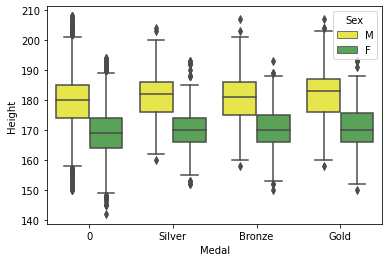

In [61]:
sns.boxplot(x="Medal", y="Height", hue="Sex", data=athletes_df_no_null, palette="Set1_r") 

Gràficament es veu clarament la diferència entre sexes, les altres diferències són molt més subtils.

Consultat: https://www.reneshbedre.com/blog/anova.html